In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mode

In [2]:
train = pd.read_csv(r"C:\Users\User\Desktop\Inceptez_datascience\Noor\Linear Regression - 4\Train_UWu5bXk.txt")
test = pd.read_csv(r"C:\Users\User\Desktop\Inceptez_datascience\Noor\Linear Regression - 4\Test_u94Q5KV.txt")
submission = pd.read_csv(r"C:\Users\User\Desktop\Inceptez_datascience\Noor\Linear Regression - 4\SampleSubmission_TmnO39y.txt")

In [3]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [4]:
train["data"] = "train"
test["data"] = "test"

In [5]:
train.columns,test.columns

(Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'Item_Outlet_Sales', 'data'],
       dtype='object'),
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'data'],
       dtype='object'))

In [6]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN
...,...,...,...
5676,FDB58,OUT046,NaN
5677,FDD47,OUT018,NaN
5678,NCO17,OUT045,NaN
5679,FDJ26,OUT017,NaN


In [7]:
data=pd.concat([train,test])

In [8]:
data.shape

(14204, 13)

In [9]:
data.head(),data

(  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
 0           FDA15         9.30          Low Fat         0.016047   
 1           DRC01         5.92          Regular         0.019278   
 2           FDN15        17.50          Low Fat         0.016760   
 3           FDX07        19.20          Regular         0.000000   
 4           NCD19         8.93          Low Fat         0.000000   
 
                Item_Type  Item_MRP Outlet_Identifier  \
 0                  Dairy  249.8092            OUT049   
 1            Soft Drinks   48.2692            OUT018   
 2                   Meat  141.6180            OUT049   
 3  Fruits and Vegetables  182.0950            OUT010   
 4              Household   53.8614            OUT013   
 
    Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
 0                       1999      Medium               Tier 1   
 1                       2009      Medium               Tier 3   
 2                       1999      Medium 

In [10]:
data=data.reset_index()

In [11]:
data=data.drop(columns="index")

In [12]:
data.head(),data.tail()

(  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
 0           FDA15         9.30          Low Fat         0.016047   
 1           DRC01         5.92          Regular         0.019278   
 2           FDN15        17.50          Low Fat         0.016760   
 3           FDX07        19.20          Regular         0.000000   
 4           NCD19         8.93          Low Fat         0.000000   
 
                Item_Type  Item_MRP Outlet_Identifier  \
 0                  Dairy  249.8092            OUT049   
 1            Soft Drinks   48.2692            OUT018   
 2                   Meat  141.6180            OUT049   
 3  Fruits and Vegetables  182.0950            OUT010   
 4              Household   53.8614            OUT013   
 
    Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
 0                       1999      Medium               Tier 1   
 1                       2009      Medium               Tier 3   
 2                       1999      Medium 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  data                       14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [15]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
data                            0
dtype: int64

In [16]:
numerical_columns=data.select_dtypes(include=np.number).drop(columns=['Item_Outlet_Sales']).columns

In [17]:
category_columns=data.select_dtypes(exclude=np.number).columns

In [18]:
numerical_columns,category_columns

(Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'),
 Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'data'],
       dtype='object'))

In [19]:
data[category_columns].apply(lambda x: x.nunique())

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
data                       2
dtype: int64

In [20]:
data[category_columns].apply(lambda x: print(x.value_counts()))

FDR13    10
FDE53    10
FDF41    10
FDC41    10
FDP25    10
         ..
FDI46     7
FDS22     7
FDR51     7
FDL50     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT046    1550
OUT035    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Med

Item_Identifier         None
Item_Fat_Content        None
Item_Type               None
Outlet_Identifier       None
Outlet_Size             None
Outlet_Location_Type    None
Outlet_Type             None
data                    None
dtype: object

In [21]:
data[numerical_columns].isna().sum(),data[category_columns].isna().sum()

(Item_Weight                  2439
 Item_Visibility                 0
 Item_MRP                        0
 Outlet_Establishment_Year       0
 dtype: int64,
 Item_Identifier            0
 Item_Fat_Content           0
 Item_Type                  0
 Outlet_Identifier          0
 Outlet_Size             4016
 Outlet_Location_Type       0
 Outlet_Type                0
 data                       0
 dtype: int64)

In [22]:
test.isna().sum(),train.isna().sum(),data.isna().sum()

(Item_Identifier                 0
 Item_Weight                   976
 Item_Fat_Content                0
 Item_Visibility                 0
 Item_Type                       0
 Item_MRP                        0
 Outlet_Identifier               0
 Outlet_Establishment_Year       0
 Outlet_Size                  1606
 Outlet_Location_Type            0
 Outlet_Type                     0
 data                            0
 dtype: int64,
 Item_Identifier                 0
 Item_Weight                  1463
 Item_Fat_Content                0
 Item_Visibility                 0
 Item_Type                       0
 Item_MRP                        0
 Outlet_Identifier               0
 Outlet_Establishment_Year       0
 Outlet_Size                  2410
 Outlet_Location_Type            0
 Outlet_Type                     0
 Item_Outlet_Sales               0
 data                            0
 dtype: int64,
 Item_Identifier                 0
 Item_Weight                  2439
 Item_Fat_Content        

In [23]:
train.groupby(['Item_Visibility','Item_Type']).Item_Outlet_Sales.mean()

Item_Visibility  Item_Type            
0.000000         Baking Goods             1598.334276
                 Breads                   2612.090059
                 Breakfast                1828.064867
                 Canned                   2257.667273
                 Dairy                    2220.057537
                                             ...     
0.309390         Household                 138.486400
0.311090         Baking Goods              154.465600
0.321115         Fruits and Vegetables     199.740000
0.325781         Household                 761.009400
0.328391         Canned                    588.567200
Name: Item_Outlet_Sales, Length: 8006, dtype: float64

In [24]:
data.groupby(['Outlet_Identifier']).Item_Outlet_Sales.sum().sort_values(ascending=False)

Outlet_Identifier
OUT027    3.453926e+06
OUT035    2.268123e+06
OUT049    2.183970e+06
OUT017    2.167465e+06
OUT013    2.142664e+06
OUT046    2.118395e+06
OUT045    2.036725e+06
OUT018    1.851823e+06
OUT010    1.883402e+05
OUT019    1.796941e+05
Name: Item_Outlet_Sales, dtype: float64

In [25]:
data.groupby(['Item_Identifier','Item_Type']).Item_Outlet_Sales.sum().sort_values(ascending=False)

Item_Identifier  Item_Type            
FDY55            Fruits and Vegetables    42661.8008
FDA15            Dairy                    41584.5364
FDZ20            Fruits and Vegetables    40185.0248
FDF05            Frozen Foods             36555.7490
FDA04            Frozen Foods             35741.4756
                                             ...    
FDQ04            Frozen Foods               784.3124
FDF38            Canned                     771.6622
FDY43            Fruits and Vegetables      673.7896
NCR42            Household                  332.9000
FDQ60            Baking Goods               120.5098
Name: Item_Outlet_Sales, Length: 1559, dtype: float64

In [26]:
data[data['Outlet_Identifier']=='OUT027'].groupby(['Item_Identifier']).Item_Outlet_Sales.sum().sort_values(ascending=False)

Item_Identifier
NCE42    13086.9648
FDQ19    12117.5600
FDZ20    11445.1020
FDP33    10993.6896
FDI50    10306.5840
            ...    
FDK02        0.0000
FDJ60        0.0000
FDJ57        0.0000
FDY28        0.0000
DRA12        0.0000
Name: Item_Outlet_Sales, Length: 1559, dtype: float64

In [27]:
#EDA - Exploratory Data Analysis

<AxesSubplot:xlabel='Outlet_Identifier'>

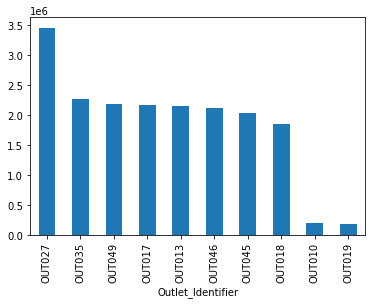

In [28]:
data.groupby(['Outlet_Identifier']).Item_Outlet_Sales.sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Item_Identifier,Item_Type'>

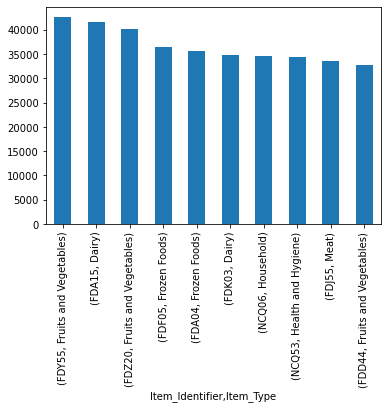

In [29]:
data.groupby(['Item_Identifier','Item_Type']).Item_Outlet_Sales.sum().sort_values(ascending=False).head(10).plot(kind='bar')

<AxesSubplot:xlabel='Outlet_Type'>

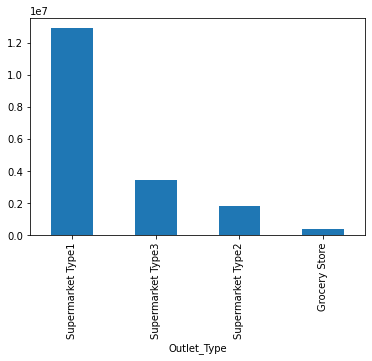

In [30]:
data.groupby('Outlet_Type').Item_Outlet_Sales.sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Item_Type'>

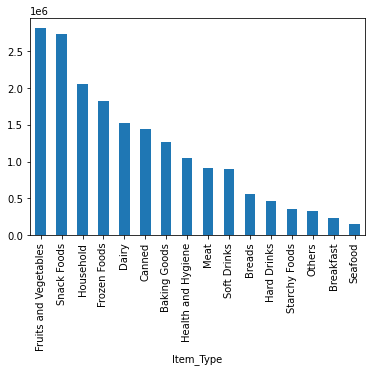

In [31]:
data.groupby('Item_Type').Item_Outlet_Sales.sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Item_Type'>

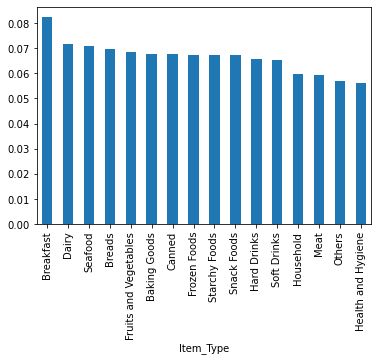

In [32]:
data.groupby('Item_Type').Item_Visibility.mean().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:title={'center':'Item_Weight'}, xlabel='Outlet_Identifier'>

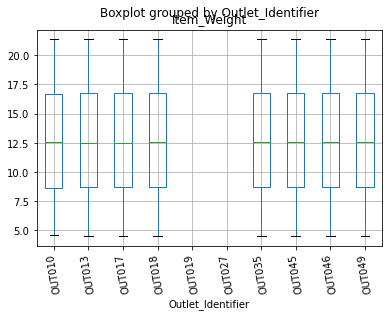

In [33]:
data.boxplot(column='Item_Weight', by='Outlet_Identifier',rot=100)

<AxesSubplot:title={'center':'Item_Outlet_Sales'}, xlabel='Outlet_Identifier'>

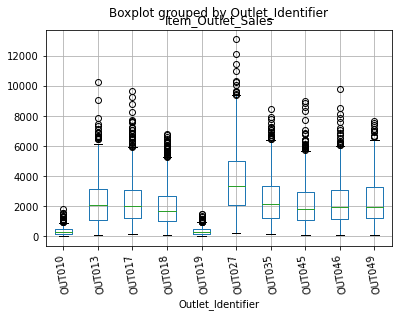

In [34]:
data.boxplot(column='Item_Outlet_Sales',by='Outlet_Identifier',rot=100)

<AxesSubplot:title={'center':'Item_Outlet_Sales'}, xlabel='Outlet_Type'>

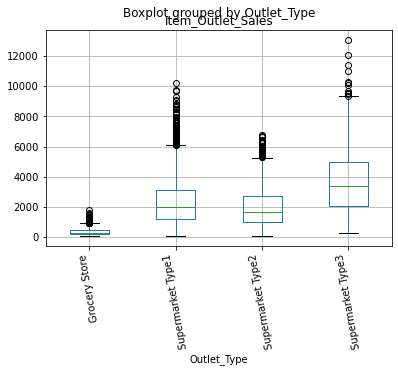

In [35]:
data.boxplot(column='Item_Outlet_Sales',by='Outlet_Type',rot=100)

<AxesSubplot:title={'center':'Item_Visibility'}, xlabel='Item_Type'>

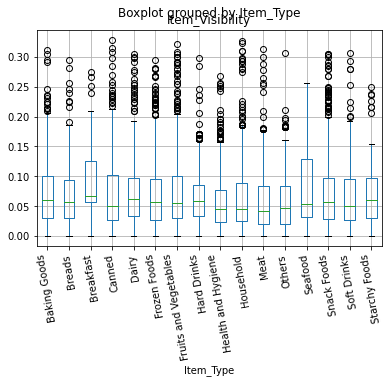

In [36]:
data.boxplot(column='Item_Visibility',by='Item_Type',rot=100)

<AxesSubplot:title={'center':'Item_Visibility'}, xlabel='Outlet_Type'>

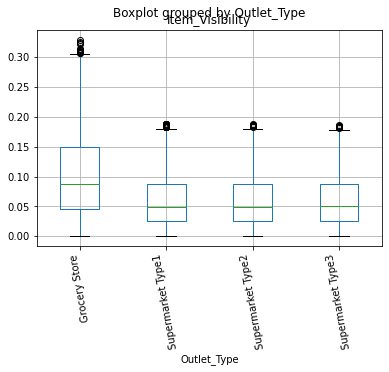

In [37]:
data.boxplot(column='Item_Visibility',by='Outlet_Type',rot=100)

<AxesSubplot:xlabel='Outlet_Type'>

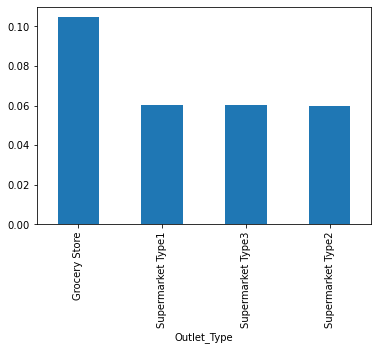

In [38]:
data.groupby('Outlet_Type').Item_Visibility.mean().sort_values(ascending=False).plot(kind='bar')

In [39]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

<AxesSubplot:ylabel='Frequency'>

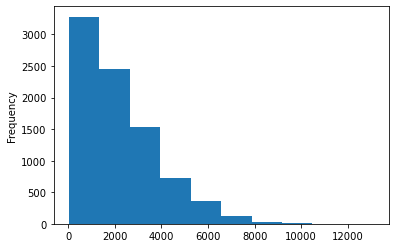

In [40]:
train['Item_Outlet_Sales'].plot(kind='hist')

TypeError: boxplot() got an unexpected keyword argument 'rot'

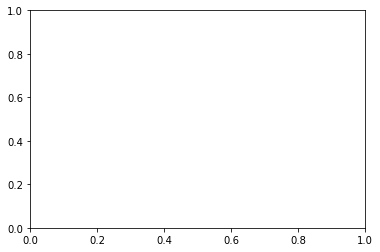

In [41]:
sns.boxplot(data=train,x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',rot=1000)

In [ ]:
sns.boxplot(data=train,x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Identifier')

In [ ]:
data[data['Outlet_Identifier']=='OUT027'].Outlet_Establishment_Year.unique()

In [ ]:
data['Item_Identifier_group']=data['Item_Identifier'].apply(lambda x: x[0:3])

In [ ]:
data.groupby('Item_Identifier_group').Item_Type.value_counts()

In [ ]:
#Data Preprocessing

In [ ]:
data[data.duplicated()].sum()

In [ ]:
data['Item_Fat_Content'].value_counts()

In [ ]:
data['Item_Fat_Content'].replace({'LF': 'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

In [ ]:
data['Item_Fat_Content'].value_counts()

In [ ]:
data.isna().sum()

In [42]:
data[data['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,train
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,train
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,train
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14178,FDX32,NaN,Regular,0.099375,Fruits and Vegetables,143.6786,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test
14179,FDC39,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test
14184,DRG37,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test
14188,DRE03,NaN,Low Fat,0.024110,Dairy,46.0718,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test


In [43]:
data['Item_Weight']=data.groupby('Item_Identifier').Item_Weight.transform(lambda x: x.fillna(x.mean()))

In [44]:
data[data['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data


In [45]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
data                            0
dtype: int64

In [46]:
data.Outlet_Size.value_counts(),data.Outlet_Size.isna().sum()

(Medium    4655
 Small     3980
 High      1553
 Name: Outlet_Size, dtype: int64,
 4016)

In [47]:
data.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [48]:
data.pivot_table(values='Outlet_Size',index='Outlet_Type',aggfunc=(lambda x : mode(x).mode[0]))

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [49]:
data["Outlet_Size"] = data.groupby("Outlet_Type").Outlet_Size.transform(lambda x: x.fillna(x.mode()[0]))

In [50]:
data.Outlet_Size.value_counts()

Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

In [51]:
data.Outlet_Size.isna().sum()

0

In [52]:
data.Outlet_Size.value_counts()

Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

In [53]:
data[data.Outlet_Size.isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data


In [54]:
data.Item_Visibility.value_counts()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [55]:
data['Item_Visibility']=data['Item_Visibility'].replace({0:np.NAN})

In [56]:
data['Item_Visibility']=data.groupby('Item_Identifier').Item_Visibility.transform(lambda x: x.fillna(x.mean()))

In [57]:
data.Item_Visibility.value_counts()

0.121880    6
0.029515    4
0.014183    4
0.088755    3
0.152197    3
           ..
0.013147    1
0.098790    1
0.073397    1
0.015452    1
0.115072    1
Name: Item_Visibility, Length: 13688, dtype: int64

In [58]:
data["Item_Visibility"].isna().sum()

0

In [59]:
data['Outlet_Age']=2021-data['Outlet_Establishment_Year']

In [83]:
del data['Outlet_Establishment_Year']

In [85]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,train,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,train,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,train,22
3,FDX07,19.20,Regular,0.022930,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,train,23
4,NCD19,8.93,Low Fat,0.014670,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,train,34


In [86]:
# Data preparation

In [87]:
data.select_dtypes(include=np.number).corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age
Item_Weight,1.000000,-0.023856,0.035751,0.013261,-0.000247
Item_Visibility,-0.023856,1.000000,-0.009052,-0.127014,0.083799
Item_MRP,0.035751,-0.009052,1.000000,0.567574,-0.000141
Item_Outlet_Sales,0.013261,-0.127014,0.567574,1.000000,0.049135
Outlet_Age,-0.000247,0.083799,-0.000141,0.049135,1.000000


<AxesSubplot:>

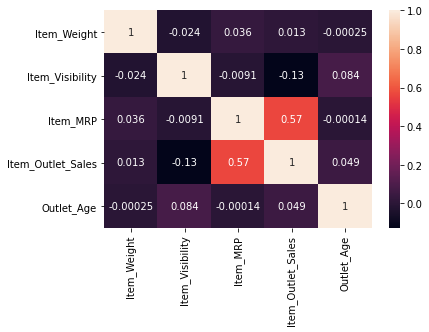

In [88]:
sns.heatmap(data.select_dtypes(include=np.number).corr(),annot=True)

In [90]:
numeric_data_columns=data.select_dtypes(include=np.number).drop(columns=['Item_Outlet_Sales'])

In [91]:
numeric_data_columns

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,9.30,0.016047,249.8092,22
1,5.92,0.019278,48.2692,12
2,17.50,0.016760,141.6180,22
3,19.20,0.022930,182.0950,23
4,8.93,0.014670,53.8614,34
...,...,...,...,...
14199,10.50,0.013496,141.3154,24
14200,7.60,0.142991,169.1448,12
14201,10.00,0.073529,118.7440,19
14202,15.30,0.098200,214.6218,14


In [92]:
category_data_columns=data.select_dtypes(exclude=np.number).drop(columns=['Item_Identifier','data']).columns

In [100]:
preprocess_category_data_columns=pd.get_dummies(data[category_data_columns])

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
scaler = StandardScaler()

In [95]:
preprocess_numeric_data_columns = pd.DataFrame(scaler.fit_transform(data[numeric_data_columns]), columns=numeric_data_columns)

ValueError: Boolean array expected for the condition, not float64

In [102]:
#Performng standard scaling
from sklearn.preprocessing import StandardScaler
 
std_scale = StandardScaler()
df_std = std_scale.fit_transform(numeric_data_columns)

In [103]:
df_std

array([[-0.75101393, -1.08638461,  1.75251118, -0.13968068],
       [-1.47765312, -1.02187439, -1.4936965 , -1.3342284 ],
       [ 1.01183853, -1.07215297,  0.00987397, -0.13968068],
       ...,
       [-0.60052652,  0.06131771, -0.35855788, -0.49804499],
       [ 0.53887812,  0.55392284,  1.18574722, -1.09531886],
       [-0.70801753,  0.68410607, -0.98589388, -0.49804499]])

In [105]:
preprocess_numeric_data_columns = pd.DataFrame(df_std,columns = numeric_data_columns.columns)

In [106]:
final_preprocessed = pd.concat([preprocess_category_data_columns, preprocess_numeric_data_columns, data[["Item_Identifier","Outlet_Identifier","data", "Item_Outlet_Sales"]]], axis = 1)

In [107]:
train_preprocessed=final_preprocessed[final_preprocessed['data']=='train']

In [108]:
test_preprocessed=final_preprocessed[final_preprocessed['data']=='test']

In [110]:
test_preprocessed=test_preprocessed.drop(columns=['data','Item_Outlet_Sales'])

In [111]:
train_preprocessed.to_csv('train_preprocessed.csv')
test_preprocessed.to_csv('test_preprocessed.csv')

In [113]:
train_preprocessed.head(),test_preprocessed.head()

(   Item_Fat_Content_LF  Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
 0                    0                         1                         0   
 1                    0                         0                         1   
 2                    0                         1                         0   
 3                    0                         0                         1   
 4                    0                         1                         0   
 
    Item_Fat_Content_low fat  Item_Fat_Content_reg  Item_Type_Baking Goods  \
 0                         0                     0                       0   
 1                         0                     0                       0   
 2                         0                     0                       0   
 3                         0                     0                       0   
 4                         0                     0                       0   
 
    Item_Type_Breads  Item_Type_Breakfast  Item_Type_C

In [114]:
#Model

In [115]:
model = LinearRegression()

In [119]:
x=train_preprocessed.drop(columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [120]:
y = train_preprocessed['Item_Outlet_Sales']

In [127]:
model.fit(x,y)

LinearRegression()

In [129]:
mean_squared_error(y, model.predict(x),squared=False)

1127.0911333692716

In [130]:
x_test = test_preprocessed.drop(columns=['Item_Identifier','Outlet_Identifier'])

In [126]:
y_pred=model.predict(x_test)

In [131]:
submission["Item_Outlet_Sales"] = y_pred

In [132]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1840.0
1,FDW14,OUT017,1436.0
2,NCN55,OUT010,1872.0
3,FDQ58,OUT017,2568.0
4,FDY38,OUT027,5164.0
...,...,...,...
5676,FDB58,OUT046,2316.0
5677,FDD47,OUT018,2480.0
5678,NCO17,OUT045,1832.0
5679,FDJ26,OUT017,3556.0


In [133]:
submission['Item_Outlet_Sales'] = np.abs(submission['Item_Outlet_Sales'])

In [134]:
submission.to_csv("linear_regression_result.csv", index = False)